# 대전광역시 흡연위험지수 산출 및 시각화

지자체에서 제공하는 공공데이터를 토대로 흡연 및 금연지역과 관련된 데이터가 포함되어있습니다.  
EDA의 목표는 흡연지수산출을 위한 각 feature들의 패턴 및 인사이트 발견입니다.

## 데이터셋 살펴보기

총 7개의 전처리된 csv 파일이 준비되었고, 데이터 병합작업을 통해 df.pickle 파일로 EDA를 진행합니다.

1. 과태료 (2807, 7)
2. 금연구역 (44475, 7)
3. 병의원 (2300, 7)
4. 주차장 (850, 6)
5. 상권정보 (75145, 9)
6. 지역사회건강조사 설문 (4610, 6)
7. 주민등록인구 (164, 9)

## 라이브러리 및 함수 준비

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 100, "display.max_columns", 50)
from datetime import date
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

color = sns.color_palette()

# import matplotlib.font_manager as fm  # 폰트 관련 용도
# font_path = 'C:/Users/JBY/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
# font_name = fm.FontProperties(fname=font_path, size=10).get_name()
# plt.rc('font', family=font_name, size=15)
# plt.rcParams['axes.unicode_minus'] = False
# fm._rebuild()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.size'] = 12

In [ ]:
# Annotate text on graph
def annotate_text(p, append_to_text='%'):
    for p in ax.patches:
        txt = str(p.get_height().round(2)) + append_to_text
        txt_x = p.get_x() + p.get_width()/2.
        txt_y = 0.92*p.get_height()
        ax.text(txt_x,txt_y,txt, fontsize=20, color='#004235', ha='center', va='bottom')

In [ ]:
# PATH = 'D:/project/데이터 분석 프로젝트/이노포스트/data/전처리 완료 데이터/'
# PATH = 'G:/다른 컴퓨터/My_desktop/project/데이터 분석 프로젝트/이노포스트/data/전처리 완료 데이터/'
PATH =  '/content/drive/MyDrive/이노포스트/data/전처리 완료 데이터/'

In [ ]:
# colab용 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 로드

In [ ]:
# fine = pd.read_csv(PATH + '과태료_전처리(완)_1205.csv', encoding='cp949')
# nszone = pd.read_csv(PATH + '금연구역_전처리(완)_1205.csv', encoding='cp949')
# hospital = pd.read_csv(PATH + '병의원_전처리(완)_1205.csv', encoding='cp949')
# parking = pd.read_csv(PATH + '주차장_전처리(완)_1205.csv', encoding='cp949')
# comm = pd.read_csv(PATH + '상권정보_전처리(완)_1205.csv', encoding='cp949')
# survey = pd.read_csv(PATH + '지역사회건강조사_전처리(완)_1205.csv', encoding='cp949')
# population = pd.read_csv(PATH + '주민등록인구_전처리(완)_1205.csv', encoding='cp949')

# print('done')

In [ ]:
# df 불러오기
df = pd.read_pickle(PATH + 'EDA.pkl')

In [ ]:
df.head(2)

,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,남자,1,8,0,0,0,0,0
1,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,여자,8,8,0,0,0,0,0


In [ ]:
df.shape

(130350, 22)

## 과태료

체크리스트

* 과태료의 형태 
* 구 별 과태료 발생 현황
    * 액수 합계
    * 발생 건수 합계
* 행정동 별 과태료 발생 현황
     * 액수 합계
     * 발생 건수 합계
* 연도별 과태료 발생 추이

In [ ]:
fine = df[df['구분']=='과태료'].reset_index()
fine.head(2)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,917,과태료,대덕구,대화동,127.416588,36.363914,2016-10-04,80000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,918,과태료,대덕구,대화동,127.415047,36.363464,2017-11-27,80000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
fine.drop('index', axis=1, inplace=True)

In [ ]:
# null check
fine.isnull().sum()

구분         0
구          0
행정동        0
경도         0
위도         0
부과일자       0
최초본세       0
분류         0
이름         0
병원유형       0
주차장유형      0
대분류        0
중분류        0
소분류        0
성별         0
담배흡연       0
액상흡연       0
total      0
0~19세      0
20~39세     0
40~59세     0
60 over    0
dtype: int64

### 과태료 확인

In [ ]:
print(sorted(fine['최초본세'].unique()))
fine['최초본세'].value_counts()

[12000, 15000, 24000, 30000, 40000, 50000, 80000, 100000, 1360000]


80000      1779
100000      803
24000       141
40000        35
30000        29
50000        14
12000         3
15000         1
1360000       1
Name: 최초본세, dtype: int64

In [ ]:
fine.index

RangeIndex(start=0, stop=2806, step=1)

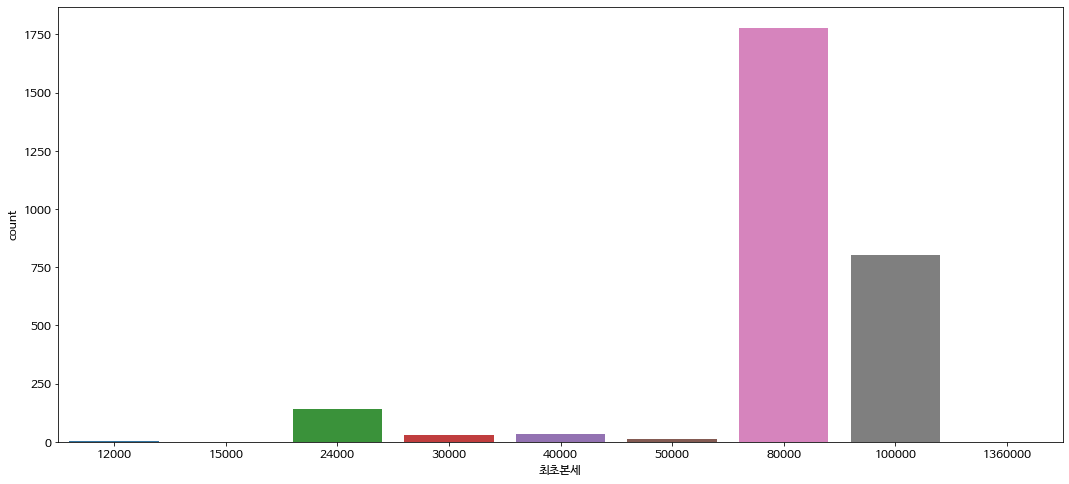

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x='최초본세', data=fine)

1.2만원부터 136만원까지 존재하며  
8만원과 10만원이 가장 많이 부과되었다.  
136만원?

In [ ]:
fine[fine['최초본세'] > 100000]

,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
2622,과태료,중구,용두동,127.41449,36.32407,2015-04-10,1360000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


이상치로 보인다.  

In [ ]:
# 136만원 제거
idx = fine[fine['최초본세'] > 200000].index
fine = fine.drop(idx)
df = df.drop(idx)

### 구 & 행정동 별 과태료 발생현황

In [ ]:
# 구 별 과태료 액수의 합계
print(fine.groupby('구')['최초본세'].sum())
print(fine.groupby('구')['최초본세'].sum()/fine['최초본세'].sum())

구
대덕구     24356000
동구      14788000
서구     128693000
유성구     21688000
중구      39500000
Name: 최초본세, dtype: uint32
구
대덕구    0.106346
동구     0.064569
서구     0.561917
유성구    0.094697
중구     0.172470
Name: 최초본세, dtype: float64


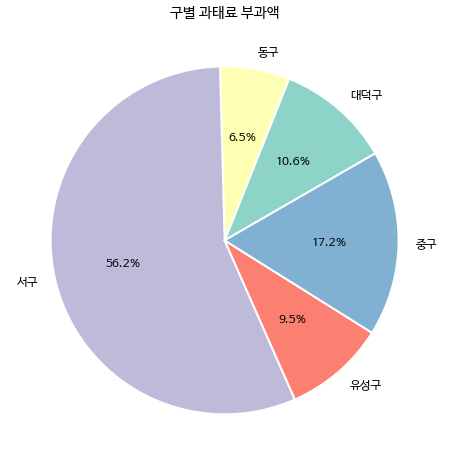

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(fine.groupby('구')['최초본세'].sum(), labels=fine['구'].unique(), autopct='%.1f%%', colors= sns.color_palette('Set3', 10), startangle=30, wedgeprops={'linewidth':2, 'edgecolor': 'white'})
plt.title('구별 과태료 부과액')
plt.show()

전체 과태료의 56%가 서구에서 발생했다.

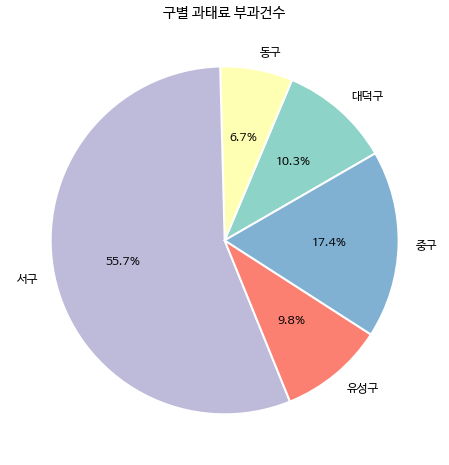

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(fine.groupby('구')['최초본세'].count(), labels=fine['구'].unique(), autopct='%.1f%%',  colors= sns.color_palette('Set3', 10), startangle=30, wedgeprops={'linewidth':2, 'edgecolor': 'white'})
plt.title('구별 과태료 부과건수')
plt.show()

구별 과태료 부과액 및 부과건수 순위는 '서구> 중구> 대덕구> 유성구> 동구'로 일치

In [ ]:
fine['구_행정동'] = np.nan

for i in fine.index:
    fine['구_행정동'][i] = fine['구'][i] + ' ' + fine['행정동'][i]

In [ ]:
fine.groupby(['구_행정동'])['최초본세'].sum().sort_values(ascending=False)

구_행정동
서구 갈마2동     21536000
서구 괴정동      13702000
중구 산성동      10830000
서구 월평1동      9312000
서구 탄방동       8294000
서구 용문동       7864000
서구 갈마1동      7458000
서구 내동        7374000
중구 은행선화동     5780000
서구 둔산2동      5581000
서구 관저2동      5334000
서구 가장동       4832000
서구 관저1동      4184000
서구 변동        4044000
서구 둔산3동      3936000
대덕구 비래동      3838000
서구 월평3동      3544000
대덕구 중리동      3430000
중구 문화2동      3276000
서구 도마2동      3240000
유성구 온천2동     3222000
서구 도마1동      3184000
서구 복수동       3178000
중구 문화1동      2848000
서구 둔산1동      2710000
유성구 온천1동     2488000
대덕구 덕암동      2464000
중구 중촌동       2404000
유성구 진잠동      2380000
중구 용두동       2364000
서구 도안동       2122000
서구 만년동       2094000
동구 가양2동      2064000
유성구 원신흥동     2048000
대덕구 신탄진동     2040000
중구 유천2동      2020000
대덕구 오정동      1984000
대덕구 석봉동      1980000
동구 용전동       1968000
대덕구 법1동      1888000
유성구 노은3동     1844000
서구 월평2동      1836000
중구 유천1동      1800000
중구 석교동       1770000
대덕구 송촌동      1700000
유성구 노은1동     1684000
중구 목동        1660000
중구 태평2동

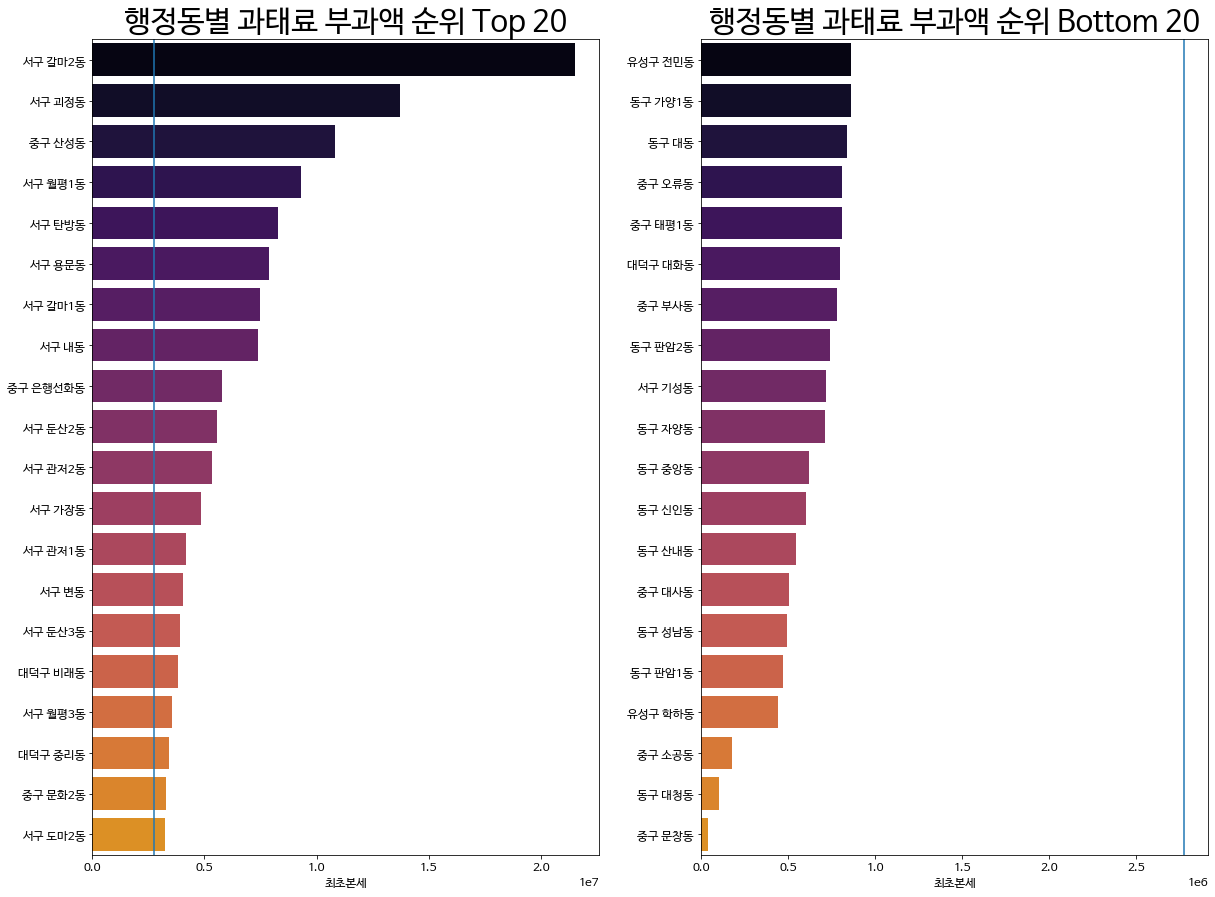

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,15))
top_20 = fine.groupby(['구_행정동'])['최초본세'].sum().sort_values(ascending=False)[:20].to_frame()
sns.barplot(top_20['최초본세'], top_20.index,palette=sns.color_palette('inferno',25), ax=ax[0])
#top_20.plot.barh(color=sns.color_palette('summer',20),ax=ax[0])
ax[0].axvline(fine.groupby(['구_행정동'])['최초본세'].sum().mean())
ax[0].set_title('행정동별 과태료 부과액 순위 Top 20', {'fontsize':30})
ax[0].set_ylabel('')

bottom_20 = fine.groupby(['구_행정동'])['최초본세'].sum().sort_values(ascending=False)[63:83].to_frame()
sns.barplot(bottom_20['최초본세'], bottom_20.index,palette=sns.color_palette('inferno',25), ax=ax[1])
#bottom_20.plot.barh(color=sns.color_palette('summer',20),ax=ax[1])
ax[1].axvline(fine.groupby(['구_행정동'])['최초본세'].sum().mean())
ax[1].set_title('행정동별 과태료 부과액 순위 Bottom 20', {'fontsize':30})
ax[1].set_ylabel('')
plt.show()


부과액 1위는 '서구 갈마2동' (21,536,000원), 부과액 83위는 '중구 문창동' (40,000원)

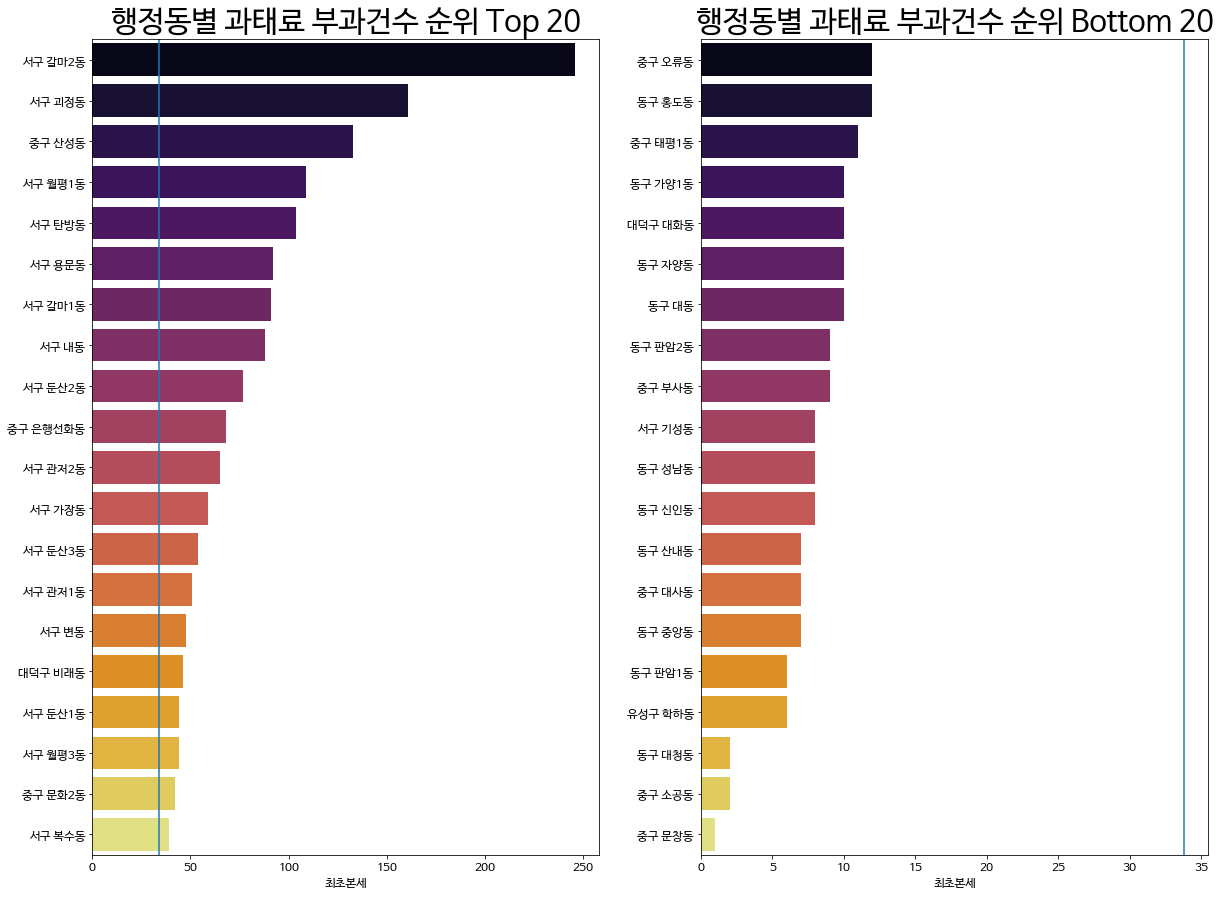

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,15))
top_20 = fine.groupby(['구_행정동'])['최초본세'].count().sort_values(ascending=False)[:20].to_frame()
sns.barplot(top_20['최초본세'], top_20.index,palette=sns.color_palette('inferno',20), ax=ax[0])
ax[0].axvline(fine.groupby(['구_행정동'])['최초본세'].count().mean())
ax[0].set_title('행정동별 과태료 부과건수 순위 Top 20', {'fontsize':30})
ax[0].set_ylabel('')

bottom_20 = fine.groupby(['구_행정동'])['최초본세'].count().sort_values(ascending=False)[63:83].to_frame()
sns.barplot(bottom_20['최초본세'], bottom_20.index,palette=sns.color_palette('inferno',20), ax=ax[1])
ax[1].axvline(fine.groupby(['구_행정동'])['최초본세'].count().mean())
ax[1].set_title('행정동별 과태료 부과건수 순위 Bottom 20', {'fontsize':30})
ax[1].set_ylabel('')
plt.show()

부과건수 1위는 '서구 갈마2동' (246건), 부과건수 83위는 '중구 문창동' (1건)

In [ ]:
fine_0 = fine[fine['구']=='서구']['행정동'].value_counts()[:10]
fine_1 = fine[fine['구']=='중구']['행정동'].value_counts()[:10]
fine_2 = fine[fine['구']=='대덕구']['행정동'].value_counts()[:10]
fine_3 = fine[fine['구']=='유성구']['행정동'].value_counts()[:10]
fine_4 = fine[fine['구']=='동구']['행정동'].value_counts()[:10]

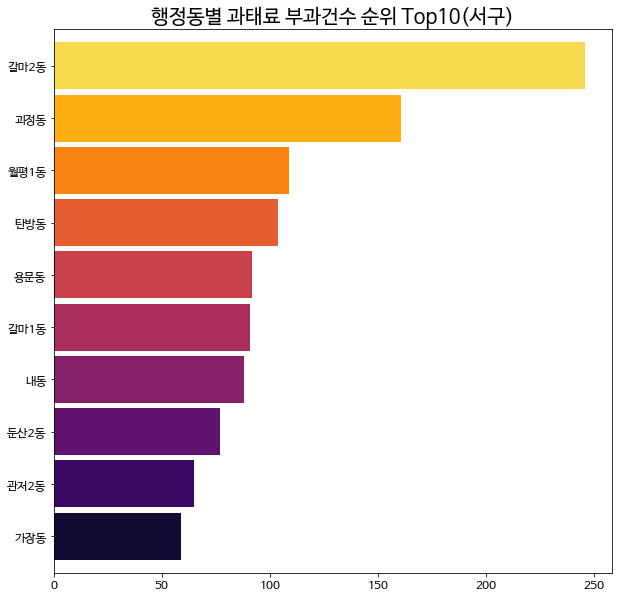

In [ ]:
plt.subplots(figsize=(10,10))
fine_0.sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('inferno', 10))
plt.title('행정동별 과태료 부과건수 순위 Top10(서구)', {'fontsize':20})
plt.show()

# 구청 소속 단속인원 배치 시 참고

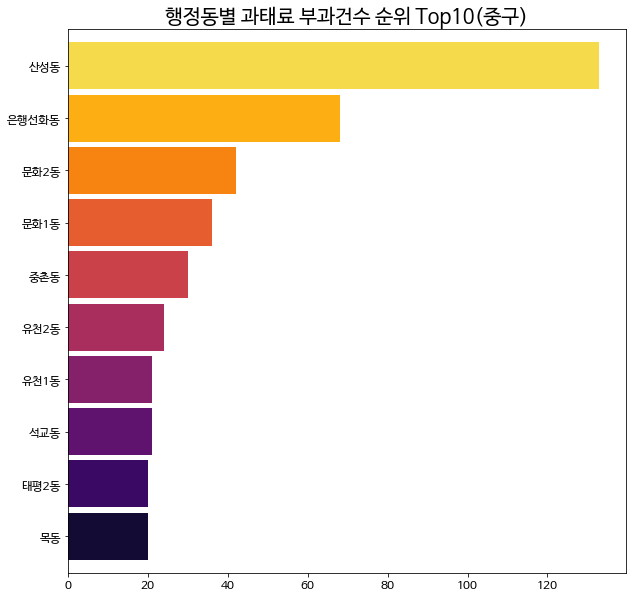

In [ ]:
plt.subplots(figsize=(10,10))
fine_1.sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('inferno', 10))
plt.title('행정동별 과태료 부과건수 순위 Top10(중구)', {'fontsize':20})
plt.show()

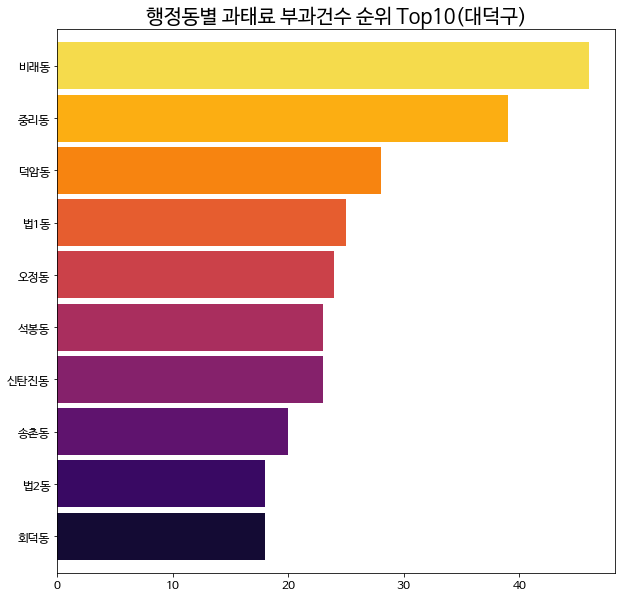

In [ ]:
plt.subplots(figsize=(10,10))
fine_2.sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('inferno', 10))
plt.title('행정동별 과태료 부과건수 순위 Top10(대덕구)', {'fontsize':20})
plt.show()

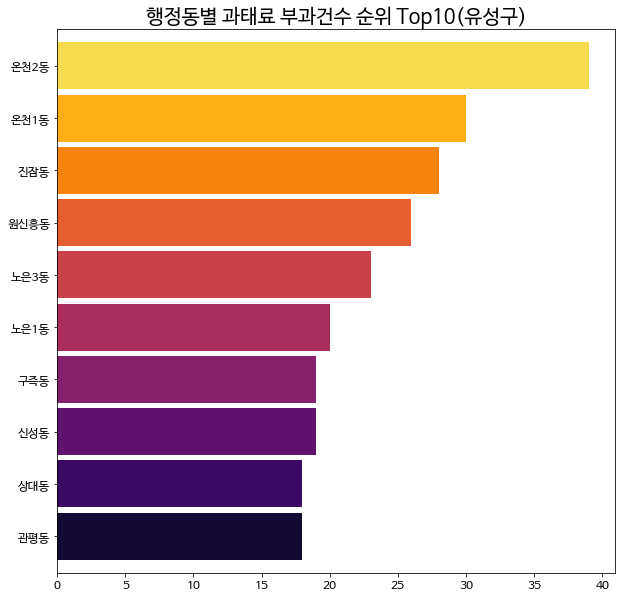

In [ ]:
plt.subplots(figsize=(10,10))
fine_3.sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('inferno', 10))
plt.title('행정동별 과태료 부과건수 순위 Top10(유성구)', {'fontsize':20})
plt.show()

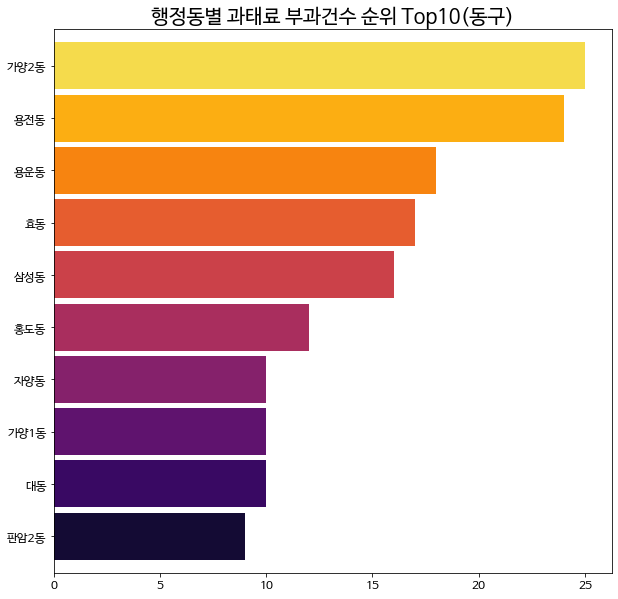

In [ ]:
plt.subplots(figsize=(10,10))
fine_4.sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('inferno', 10))
plt.title('행정동별 과태료 부과건수 순위 Top10(동구)', {'fontsize':20})
plt.show()

## 금연구역
1. 취약계층 관련 변수
  - 중고등학생시설
  - 초등학생시설
  - 유치원생시설
  - 영유아시설
  - 병의원(산부인과, 소아청소년과 관련)

2. 흡연발생위험이 높은 변수
  - 음식점
  - 술집, 유흥주점
  - PC방, 오락레저시설

3. 공공시설
  - 목욕장
  - 놀이터
  - 공원


In [ ]:
nszone = df[df['구분']=='금연구역'].reset_index(drop=True)
nszone.head(3)

,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,금연구역,대덕구,구즉동,127.387474,36.434422,0,0,청사,문평119안전센터,0,0,0,0,0,0,0,0,0,0,0,0,0
1,금연구역,대덕구,대화동,127.410622,36.364574,0,0,학원,미레도음악학원,0,0,0,0,0,0,0,0,0,0,0,0,0
2,금연구역,대덕구,대화동,127.411880,36.367062,0,0,음식점,식풍경대화점,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
nszone['분류'].unique()

array(['청사', '학원', '음식점', '의료기관', '체육시설업', '어린이운송용승합차', '어린이집', '어린이놀이시설',
       '사회복지시설', '복합건축물', '학교', '목욕장', '게임제공업소시설', '도서관', '청소년활동시설',
       '대규모점포시설', '만화대여업소시설', '대학교', '학교교과교습학원', '어린이운송용 승합자동차', '체육시설',
       '게임제공업소', '유치원', '사무용건축물', '관광숙박업소', '공동주택', '보건소', '도시공원',
       '만화대여업소', '교통관련시설', '대규모점포 및 지하도 상점가', '전통시장', '공연장',
       '담배판매업소 및 담배자동판매기', '식품자동판매기영업소', '연면적 1천제곱미터 이상 건축물',
       '어린이운송용 및 교통시설', '신고체육시설', '일반음식점 및 휴게음식점', '대규모점포', '만화',
       '담배소매업소', '게임산업', '어린이운송용차량', '숙박업소', '공장', '복합용도', '지역아동센터',
       '담배소매인업소', '실내체육시설', '음식점(휴게, 일반, 제과)', '대규모점포, 지하상점가'],
      dtype=object)

In [ ]:
nszone[nszone['분류']=='학원']['이름'].unique()
# 연령대 구분 불가능하므로 금연구역 데이터 대신 상권정보 데이터의 학원분류를 활용

array(['미레도음악학원', '성지학원', '에스라학원', ..., '포즈무용학원', '다섯손가락음악학원', '에듀윌학원'],
      dtype=object)

In [ ]:
  nszone[nszone['분류']=='의료기관']['이름'].to_frame()

,이름
69,해든의원
70,대화한빛의원
71,필치과의원
378,사회복지법인천성원대전한일병원
379,공단한의원
...,...
37551,미소앤치과의원
37552,큰우리요양병원
37553,최경호가정의학과의원
37554,풀잎치과의원


In [ ]:
nszone[nszone['분류']=='의료기관']['이름'].str.contains('소아|청소년|산부').count()

1867

## 상권정보

- 이용객의 주연령대를 기준으로 분리하여 분포 확인
- 해당 시설을 주로 이용할 것으로 추정되는 연령대를 기준으로 하여 분류

In [ ]:
comm = df[df['구분']=='상권정보'].reset_index()
comm.head(3)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,1323,상권정보,대덕구,대화동,127.402939,36.365295,0,0,0,씨엠바이오메드,0,0,소매,사무/문구/컴퓨터,사무/문구용품,0,0,0,0,0,0,0,0
1,1324,상권정보,대덕구,대화동,127.412880,36.363522,0,0,0,이레컴퓨터,0,0,소매,사무/문구/컴퓨터,컴퓨터/사무용기기종합,0,0,0,0,0,0,0,0
2,1325,상권정보,대덕구,대화동,127.402939,36.365295,0,0,0,우리OA,0,0,소매,사무/문구/컴퓨터,사무/문구용품,0,0,0,0,0,0,0,0


In [ ]:
comm.shape

(75144, 24)

In [ ]:
comm['대분류'].unique()
# '학문/교육' 분야 상권이 흡연취약계층의 이용도가 높을 것으로 추정됨.

array(['소매', '생활서비스', '음식', '학문/교육', '부동산', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

In [ ]:
comm[comm['대분류']=='학문/교육']['중분류'].unique()
# 동일한 '학문/교육' 분야 내에서도 주연령대가 상이하므로 세부 컬럼별 주연령대 파악할 필요. 

array(['유아교육', '학원-음악미술무용', '학원-보습교습입시', '학원-예능취미체육', '학원기타', '학원-어학',
       '도서관/독서실', '학원-창업취업취미', '학문교육기타', '학원-자격/국가고시', '학원-컴퓨터'],
      dtype=object)

In [ ]:
comm[comm['중분류']=='학원-보습교습입시']['소분류'].unique() 
# 입시, 검정고시 -- 중고등학생 이용시설

array(['학원-입시', '학원-검정고시', '학원-편입'], dtype=object)

In [ ]:
comm[comm['중분류']=='학원-음악미술무용']['소분류'].unique()
# '피아노/바이올린/기타', '서예/서화/미술', '학원-무용', '학원-국악' -- 유치원생, 초등학생 이용시설

array(['피아노/바이올린/기타', '서예/서화/미술', '학원-국악', '학원-무용'], dtype=object)

In [ ]:
comm[comm['중분류']=='유아교육']['소분류'].unique()
# 어린이집, 놀이방, 실내놀이터-유아, 블럭놀이방 -- 영유아 이용시설
# 유아교육기관기타의 경우 세부적인 분석 필요

array(['어린이집', '실내놀이터-유아', '놀이방', '유아교육기관기타', '블럭놀이방'], dtype=object)

In [ ]:
comm[comm['소분류']=='유아교육기관기타']
#  연구소, 교육교재 제외하고 영유아 이용시설

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over,고위험
9187,16076,상권정보,대덕구,중리동,127.435555,36.362514,0,0,0,파랑새유소년스포츠클럽,0,0,학문/교육,유아교육,유아교육기관기타,0,0,0,0,0,0,0,0,1
15305,26676,상권정보,동구,용운동,127.460648,36.326797,0,0,0,제이에이치교육,0,0,학문/교육,유아교육,유아교육기관기타,0,0,0,0,0,0,0,0,1
21921,38183,상권정보,서구,가장동,127.385086,36.331615,0,0,0,아트키즈팩토리학원,0,0,학문/교육,유아교육,유아교육기관기타,0,0,0,0,0,0,0,0,1
22568,39554,상권정보,서구,갈마1동,127.371368,36.356670,0,0,0,한국몬테소리,0,0,학문/교육,유아교육,유아교육기관기타,0,0,0,0,0,0,0,0,1
26226,45889,상권정보,서구,관저2동,127.340042,36.292522,0,0,0,다온숲어린이집,0,0,학문/교육,유아교육,유아교육기관기타,0,0,0,0,0,0,0,0,1
27465,48188,상권정보,서구,괴정동,127.382301,36.340755,0,0,0,필통스쿨,0,0,학문/교육,유아교육,유아교육기관기타,0,0,0,0,0,0,0,0,1
32580,55773,상권정보,서구,도안동,127.346024,36.315193,0,0,0,콕플레이-대전세종센터,0,0,학문/교육,유아교육,유아교육기관기타,0,0,0,0,0,0,0,0,1
32608,55801,상권정보,서구,도안동,127.340584,36.330360,0,0,0,show 뇨몬테소리대전센터,0,0,학문/교육,유아교육,유아교육기관기타,0,0,0,0,0,0,0,0,1
34607,60923,상권정보,서구,둔산2동,127.378220,36.352901,0,0,0,대전짐보리,0,0,학문/교육,유아교육,유아교육기관기타,0,0,0,0,0,0,0,0,1
35479,61795,상권정보,서구,둔산2동,127.378380,36.355453,0,0,0,슈필리안,0,0,학문/교육,유아교육,유아교육기관기타,0,0,0,0,0,0,0,0,1


In [ ]:
drop_row = comm[(comm['소분류']=='유아교육기관기타') & comm['이름'].str.contains('연구소|교육교재')].index
drop_row = drop_row.tolist()
comm = comm.drop(drop_row)
comm.shape
# 연구소, 교육교재 행 제거

(75141, 24)

In [ ]:
comm[comm['중분류']=='학원기타']['소분류'].unique()
# 불분명하므로 제외

array(['학원-기타', '학원(종합)', '운전연수전문', '학원-말더듬', '학원-심리변론', '학원-모델',
       '학원-실내운전'], dtype=object)

In [ ]:
comm[comm['중분류']=='학원-예능취미체육']['소분류'].unique()
# 태권도장, 합기도장, 검도도장, 유도장 -- 유치원생, 초등학생 이용시설
# 주산암산부기속셈, 바둑, 웅변, 펜글씨/한문 -- 유치원생, 초등학생 이용시설

array(['태권도장', '학원-주산암산부기속셈', '유도장', '합기도장', '학원-웅변', '검도도장',
       '학원-스포츠/재즈댄스', '학원-에어로빅', '학원-펜글씨/한문', '학원-요리', '학원-바둑', '학원-가요',
       '학원-꽃꽃이', '학원-사교춤', '학원-서당', '학원-배우/탤런트', '레크레이션지도/상담', '학원-사진',
       '학원-마술'], dtype=object)

In [ ]:
comm[comm['중분류']=='학원-창업취업취미']['소분류'].unique()
# 불분명하므로 제외

array(['학원-경영', '학원-공예', '학원-목공예', '학원-애견미용', '학원-속독', '학원-디자인',
       '학원-스튜디어스', '학원-칵테일', '학원-피부미용', '학원-미싱자수', '학원-경리', '학원-목욕관리사',
       '학원-만화영화', '학원-텔렉스/통신', '학원-복장'], dtype=object)

In [ ]:
comm[comm['중분류']=='학원-컴퓨터']['소분류'].unique()
# 불분명하므로 제외

array(['컴퓨터학원'], dtype=object)

In [ ]:
comm[comm['중분류']=='학문교육기타']['소분류'].unique()
# 불분명하므로 제외

array(['학습지보급', '운동/코치학교'], dtype=object)

In [ ]:
comm[comm['중분류']=='도서관/독서실']['소분류'].unique()
# 독서실 -- 중고등학생 이용시설
# 아동도서관운영 -- 초등학생 이용시설

array(['독서실', '고시원', '이동도서관운영'], dtype=object)

In [ ]:
comm[comm['중분류']=='학원-자격/국가고시']['소분류'].unique()

array(['학원-간호조무사', '학원-자동차운전', '학원-중장비', '학원-도배', '학원-미용', '학원-제과기술',
       '학원-전자통신', '학원-공인중개사', '학원-국가고시', '학원-항공기술', '학원-전기기술', '학원-속기',
       '학원/국가고시'], dtype=object)

In [ ]:
list_a = ['어린이집', '놀이방','실내놀이터-유아','블럭놀이방','유아교육기관기타']
list_b = ['피아노/바이올린/기타','서예/서화/미술','학원-무용','학원-국악','아동도서관운영','태권도장','합기도장','검도도장','유도장']
list_c = ['피아노/바이올린/기타','서예/서화/미술','학원-무용','학원-국악','아동도서관운영','태권도장','합기도장','검도도장','유도장','주산암산부기속셈','바둑','웅변','펜글씨/한문']
list_d = ['학원-입시','학원-검정고시','독서실']

def func(x):
    if x in list_a:
        return 1
    else:
        return 0
    
def func1(x):
    if x in list_b:
        return 1
    else:
        return 0

def func2(x):
    if x in list_c:
        return 1
    else:
        return 0

def func3(x):
    if x in list_d:
        return 1
    else:
        return 0

comm['영유아'] = comm['소분류'].apply(lambda x: func(x))
comm['유치원생'] = comm['소분류'].apply(lambda x: func1(x)) 
comm['초등학생'] = comm['소분류'].apply(lambda x: func2(x))
comm['중고등학생'] = comm['소분류'].apply(lambda x: func3(x))

In [ ]:
comm_aca = comm[comm['소분류'].str.contains('학원')]

In [ ]:
comm_aca['소분류'].unique()

array(['학원-입시', '학원-기타', '학원-외국어/어학', '학원-주산암산부기속셈', '학원(종합)', '학원-경영',
       '학원-공예', '학원-간호조무사', '학원-국악', '학원-어린이영어', '학원-웅변', '학원-스포츠/재즈댄스',
       '학원-자동차운전', '학원-에어로빅', '학원-펜글씨/한문', '학원-중장비', '학원-도배', '컴퓨터학원',
       '학원-목공예', '학원-요리', '학원-미용', '학원-바둑', '학원-가요', '학원-무용', '학원-제과기술',
       '학원-꽃꽃이', '학원-전자통신', '학원-사교춤', '학원-애견미용', '학원-서당', '학원-말더듬',
       '학원-심리변론', '학원-속독', '학원-공인중개사', '학원-배우/탤런트', '학원-검정고시', '학원-디자인',
       '학원-스튜디어스', '학원-편입', '학원-칵테일', '학원-국가고시', '학원-모델', '학원-항공기술',
       '학원-피부미용', '학원-사진', '학원-마술', '학원-미싱자수', '학원-전기기술', '학원-경리',
       '학원-목욕관리사', '학원-만화영화', '학원-실내운전', '학원-속기', '학원-텔렉스/통신', '학원/국가고시',
       '학원-복장'], dtype=object)

### 취약계층 주이용 상권 & 길거리 흡연 고위험 상권
| 취약계층 주이용 상권| 길거리 흡연 고위험 상권|
|-------------------|----------------------|
|종합소매점          |PC/오락/당구/볼링등|
|책/서적/도서        |경마/경륜/성인오락|
|호텔/콘도           |무도/유흥/가무|
|도서관/독서실       |유흥주점|
|유아교육            |닭/오리요리             |
|학원기타            |별식/퓨전요리           |
|학원-보습교습입시    |부페                   |
|학원-어학           |분식                   |
|학원-예능취미체육    |양식                   |
|학원-음악미술무용    |일식/수산물            |
|학원-컴퓨터         |중식                  |
|                   |커피점/카페            |
|                   |패스트푸드             |
|                   |한식                  |

+ 데이터프레임 상 '고위험' 컬럼 추가, 상권업종중분류명에 따라 카테고리 분류
+ 카테고리:
    0. 해당사항없음
    1. 취약계층이동지역
    2. 길거리흡연고위험지역

In [ ]:
list_pop = ['종합소매점', '책/서적/도서', '호텔/콘도', '도서관/독서실', '유아교육', '학원기타', '학원-보습교습입시', '학원-어학', '학원-예능취미체육', '학원-음악미술무용', '학원-컴퓨터']

list_danger = ['PC/오락/당구/볼링등', ' 경마/경륜/성인오락', '무도/유흥/가무', '유흥주점', '닭/오리요리', '별식/퓨전요리', '부페', '분식', '양식', '일식/수산물', '중식', '커피점/카페', '패스트푸드', '한식']

In [ ]:
def func(x):
    if x in list_pop:
        return "1"
    elif x in list_danger:
        return "2"
    else:
        return None
    
comm['고위험'] = comm['중분류'].apply(lambda x: func(x))

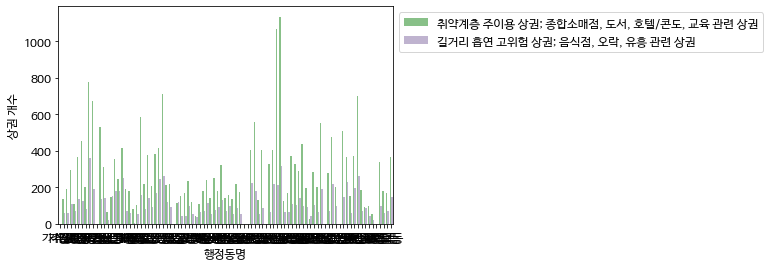

In [ ]:
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.size'] = 12

plt.rc('font', family='NanumBarunGothic')

sns.countplot(x = '행정동',
              hue = '고위험',
              data = comm,
              palette = 'Accent')

plt.xlabel('행정동명')
plt.ylabel('상권 개수')
plt.legend(['취약계층 주이용 상권; 종합소매점, 도서, 호텔/콘도, 교육 관련 상권', '길거리 흡연 고위험 상권; 음식점, 오락, 유흥 관련 상권'], loc = 2, bbox_to_anchor = (1, 1))

plt.show()

## 주차장

체크리스트
* 주차장의 분포
  * 구 별 주차장 개수
  * 행정동 별 주차장 개수
* 주차장 유형별 비율
  * 노상 주차장에서 흡연이 많이 발생하지 않을까?
  * 노상주차장: 큰 도로변에 주차구획이 그려진 공용주차장 (정부/지자체 관할)
  * 노외주차장: 지상, 지하 등 별도의 대지에 설치되어 제공되는 주차장 (지자체/민영)

In [ ]:
parking = df[df['구분']=='주차장'].reset_index()
parking.head(3)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,1321,주차장,대덕구,대화동,127.417603,36.363564,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
1,1322,주차장,대덕구,대화동,127.417603,36.363564,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
2,3598,주차장,대덕구,목상동,127.404182,36.446407,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
parking_pivot = pd.pivot_table(parking,
                               index = ['구','행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


parking_pivot = parking_pivot[['노상','노외']]
parking_pivot

주차장유형      노상   노외
구   행정동           
대덕구 1       0    0
    가수원동    0    0
    가양1동    0    0
    가양2동    0    0
    가장동     0    0
...       ...  ...
중구  학하동     0    0
    홍도동     0    0
    회덕동     0    0
    효동      0    0
All       496  354

[456 rows x 2 columns]

주차장 - 중구

In [ ]:
p_junggu = parking['구'] == '중구'
junggu = parking[p_junggu]
junggu

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
479,110324,주차장,중구,대사동,127.428017,36.317337,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
480,110325,주차장,중구,대사동,127.419609,36.310795,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
481,110326,주차장,중구,대사동,127.424049,36.315029,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
482,110327,주차장,중구,대사동,127.420891,36.316753,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
483,110328,주차장,중구,대사동,127.420967,36.316933,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,129831,주차장,중구,태평2동,127.386520,36.316811,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
846,129832,주차장,중구,태평2동,127.387115,36.316071,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
847,129833,주차장,중구,태평2동,127.394058,36.326870,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
848,129834,주차장,중구,태평2동,127.386520,36.316811,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
p_junggu_pivot = pd.pivot_table(junggu,
                               index = ['행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


p_junggu_pivot = p_junggu_pivot[['노상','노외']]
p_junggu_pivot.sort_values('노상', ascending = False)

주차장유형,노상,노외
행정동,,
All,260,111
산성동,42,20
석교동,24,5
문화1동,24,14
중촌동,18,1
은행선화동,18,11
오류동,16,4
부사동,15,10
대흥동,15,10


Text(0.5, 1.0, '행정동별 노상, 노외 주차장 분포')

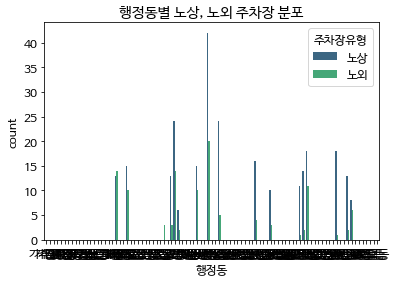

In [ ]:
park_j = sns.countplot(x = junggu['행정동'], hue = junggu['주차장유형'], palette = 'viridis')
park_j.set_title('행정동별 노상, 노외 주차장 분포')

주차장 - 유성구

In [ ]:
p_yuseonggu = parking['구'] == '유성구'
yuseonggu = parking[p_yuseonggu]
yuseonggu

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
286,80257,주차장,유성구,관평동,127.393677,36.423187,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
287,80258,주차장,유성구,관평동,127.393677,36.423187,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
288,80259,주차장,유성구,관평동,127.392586,36.428959,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
289,80260,주차장,유성구,관평동,127.391777,36.426872,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
290,80261,주차장,유성구,관평동,127.390060,36.425079,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,108218,주차장,유성구,학하동,127.310295,36.356041,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
475,108219,주차장,유성구,학하동,127.306793,36.357834,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
476,108220,주차장,유성구,학하동,127.310326,36.356773,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
477,108221,주차장,유성구,학하동,127.293251,36.345615,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
p_yuseonggu_pivot = pd.pivot_table(yuseonggu,
                               index = ['행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


p_yuseonggu_pivot = p_yuseonggu_pivot[['노상','노외']]
p_yuseonggu_pivot.sort_values('노상', ascending = False)

주차장유형,노상,노외
행정동,,
All,100,93
온천1동,24,4
온천2동,24,5
신성동,14,9
노은1동,12,0
진잠동,7,8
노은2동,5,2
학하동,4,38
전민동,4,6


Text(0.5, 1.0, '행정동별 노상, 노외 주차장 분포')

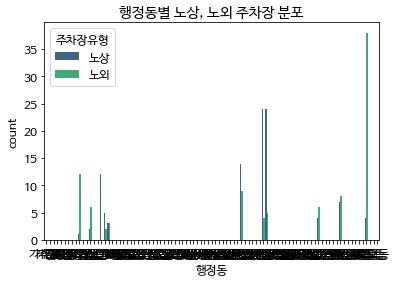

In [ ]:
park_y = sns.countplot(x = yuseonggu['행정동'], hue = yuseonggu['주차장유형'], palette = 'viridis')
park_y.set_title('행정동별 노상, 노외 주차장 분포')

주차장 - 동구

In [ ]:
p_donggu = parking['구'] == '동구'
donggu = parking[p_donggu]
donggu

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
88,18532,주차장,동구,가양1동,127.443314,36.339680,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
89,18533,주차장,동구,가양1동,127.440399,36.346684,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
90,18534,주차장,동구,가양1동,127.441704,36.340363,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
91,18535,주차장,동구,가양1동,127.443321,36.345634,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
92,18536,주차장,동구,가양1동,127.437576,36.339485,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,33235,주차장,동구,홍도동,127.422577,36.344627,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
248,34545,주차장,동구,효동,127.439903,36.314491,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
249,34546,주차장,동구,효동,127.439903,36.314491,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
250,34547,주차장,동구,효동,127.446533,36.316212,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
p_donggu_pivot = pd.pivot_table(donggu,
                               index = ['행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


p_donggu_pivot = p_donggu_pivot[['노상','노외']]
p_donggu_pivot.sort_values('노상', ascending = False)

주차장유형,노상,노외
행정동,,
All,96,68
삼성동,18,1
용운동,15,2
홍도동,14,0
판암1동,10,2
자양동,8,0
가양1동,6,4
가양2동,6,2
판암2동,4,2


Text(0.5, 1.0, '행정동별 노상, 노외 주차장 분포')

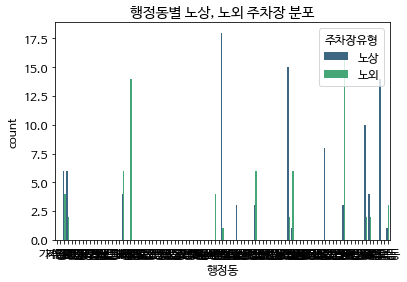

In [ ]:
park_d = sns.countplot(x = donggu['행정동'], hue = donggu['주차장유형'], palette = 'viridis')
park_d.set_title('행정동별 노상, 노외 주차장 분포')

주차장 - 서구

In [ ]:
p_seogu = parking['구'] == '서구'
seogu = parking[p_seogu]
seogu

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
252,39111,주차장,서구,갈마1동,127.364014,36.353500,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
253,39112,주차장,서구,갈마1동,127.364014,36.353500,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
254,41174,주차장,서구,갈마2동,127.376656,36.347668,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
255,41175,주차장,서구,갈마2동,127.376656,36.347668,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
256,57141,주차장,서구,둔산1동,127.388474,36.354687,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
257,57142,주차장,서구,둔산1동,127.388474,36.354687,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
258,57143,주차장,서구,둔산1동,127.388474,36.354687,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
259,57144,주차장,서구,둔산1동,127.388474,36.354687,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
260,60406,주차장,서구,둔산2동,127.383812,36.355072,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
261,60407,주차장,서구,둔산2동,127.381989,36.355068,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
p_seogu_pivot = pd.pivot_table(seogu,
                               index = ['행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


p_seogu_pivot = p_seogu_pivot[['노상']]
p_seogu_pivot.sort_values('노상', ascending = False)

주차장유형,노상
행정동,
All,34
둔산2동,10
월평1동,8
탄방동,4
둔산1동,4
갈마1동,2
갈마2동,2
월평2동,2
만년동,2


Text(0.5, 1.0, '행정동별 노상, 노외 주차장 분포')

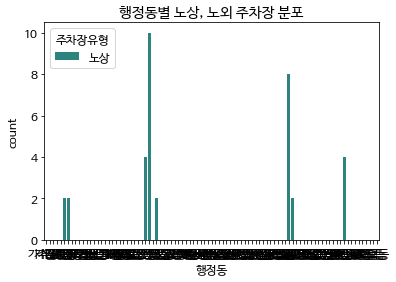

In [ ]:
park_s = sns.countplot(x = seogu['행정동'], hue = seogu['주차장유형'], palette = 'viridis')
park_s.set_title('행정동별 노상, 노외 주차장 분포')

주차장 - 대덕구

In [ ]:
p_daeduckgu = parking['구'] == '대덕구'
daeduckgu = parking[p_daeduckgu]
daeduckgu

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,1321,주차장,대덕구,대화동,127.417603,36.363564,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
1,1322,주차장,대덕구,대화동,127.417603,36.363564,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
2,3598,주차장,대덕구,목상동,127.404182,36.446407,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
3,3599,주차장,대덕구,목상동,127.404182,36.446407,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
4,4722,주차장,대덕구,법2동,127.428345,36.374352,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
5,4723,주차장,대덕구,법2동,127.428345,36.374352,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
6,5610,주차장,대덕구,비래동,127.449844,36.356720,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
7,5611,주차장,대덕구,비래동,127.448944,36.356701,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
8,5612,주차장,대덕구,비래동,127.452942,36.354618,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
9,5613,주차장,대덕구,비래동,127.449959,36.354935,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
p_daeduckgu_pivot = pd.pivot_table(daeduckgu,
                               index = ['행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


p_daeduckgu_pivot = p_daeduckgu_pivot[['노상','노외']]
p_daeduckgu_pivot.sort_values('노외', ascending = False)

주차장유형,노상,노외
행정동,,
All,6,82
신탄진동,0,18
중리동,0,18
회덕동,0,16
송촌동,4,16
비래동,2,6
석봉동,0,2
대화동,0,2
법2동,0,2


Text(0.5, 1.0, '행정동별 노상, 노외 주차장 분포')

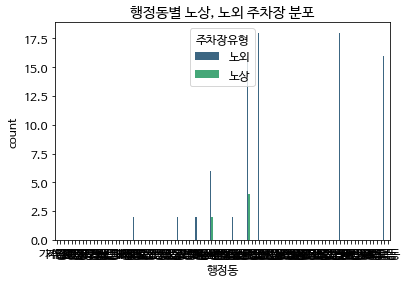

In [ ]:
park_dd = sns.countplot(x = daeduckgu['행정동'], hue = daeduckgu['주차장유형'], palette = 'viridis')
park_dd.set_title('행정동별 노상, 노외 주차장 분포')

In [ ]:
# Top 20 행정동별 노상 주차장 수
parking_pivot = pd.pivot_table(parking,
                               index = ['구','행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                               )

parking_pivot.sort_values('노상', ascending = False)[:20]

주차장유형       노상   노외    All
구   행정동                   
All        496  354  850.0
중구  산성동     42   20   62.0
유성구 온천1동    24    4   28.0
중구  문화1동    24   14   38.0
유성구 온천2동    24    5   29.0
중구  석교동     24    5   29.0
동구  삼성동     18    1   19.0
중구  은행선화동   18   11   29.0
    중촌동     18    1   19.0
    오류동     16    4   20.0
동구  용운동     15    2   17.0
중구  부사동     15   10   25.0
    대흥동     15   10   25.0
동구  홍도동     14    0   14.0
중구  유천2동    14    2   16.0
유성구 신성동     14    9   23.0
중구  대사동     13   14   27.0
    문창동     13    3   16.0
    태평1동    13    2   15.0
유성구 노은1동    12    0   12.0

In [ ]:
# Top 20 행정동별 노외 주차장 수
parking_pivot = pd.pivot_table(parking,
                               index = ['구','행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                               )

parking_pivot.sort_values('노외', ascending = False)[:20]

주차장유형       노상   노외    All
구   행정동                   
All        496  354  850.0
유성구 학하동      4   38   42.0
중구  산성동     42   20   62.0
대덕구 신탄진동     0   18   18.0
    중리동      0   18   18.0
    송촌동      4   16   20.0
동구  중앙동      3   16   19.0
대덕구 회덕동      0   16   16.0
동구  대청동      0   14   14.0
중구  대사동     13   14   27.0
    문화1동    24   14   38.0
유성구 관평동      1   12   13.0
중구  은행선화동   18   11   29.0
    대흥동     15   10   25.0
    부사동     15   10   25.0
유성구 신성동     14    9   23.0
    진잠동      7    8   15.0
동구  대동       4    6   10.0
    용전동      1    6    7.0
유성구 전민동      4    6   10.0

## 지역사회건강조사(흡연율)
8 = 해당안됨  
즉 8번은 비흡연, 그 외는 흡연자

체크리스트
* 총 응답인원 대비 흡연율
  * 남자 응답자 흡연율
  * 여자 응답자 흡연율
* 구 별 흡연율
  * 구 별 성별에 따른 흡연율


In [ ]:
survey = df[df['구분']=='설문'].reset_index()
survey.head(3)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,0,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,남자,1,8,0,0,0,0,0
1,1,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,여자,8,8,0,0,0,0,0
2,2,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,여자,8,8,0,0,0,0,0


## 인구

체크리스트

* 구 별 인구분포
  * 취약계층 인구분포
* 동 별 인구분포
  * 취약계층 인구분포
* 지역사회건강조사에서 동별, 성별별 흡연율이 구해졌다면 총 인구에 흡연율을 적용해보기


In [ ]:
population = df[df['구분']=='인구'].reset_index()
population.head(3)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,1870,인구,대덕구,대화동,0.0,0.0,0,0,0,0,0,0,0,0,0,남자,0,0,3520,365,818,1240,1097
1,1871,인구,대덕구,대화동,0.0,0.0,0,0,0,0,0,0,0,0,0,여자,0,0,3184,297,648,994,1245
2,3086,인구,대덕구,덕암동,0.0,0.0,0,0,0,0,0,0,0,0,0,남자,0,0,7141,872,2125,2466,1678


### 취약계층 인구
+ 총인구 = 취약계층 + 그외인구
+ 취약계층 = 10대이하 인구 + 임산부 인구
+ 그외인구 = 총 인구 - (10대이하 외 인구 + 임산부 인구)
    - 20대이상 남자 인구
    - 20대이상 여자 인구(혹은 가임기 여성 인구) - 임산부
        * 가임기 여성 인구 사용의 경우, 연령대별 출산율 고려 필요
        * 15~49세 가임기 여성의 출산율 참고
        * 출산율 = (1년 동안의 총 출생아 수 / 15~49세 여성 인구의 수) x 1000
+ 명확한 임산부 인구 등의 통계/집계는 확인이 어려운 것으로 판단
    - 연간 출생아수로 구별 임산부 인구 가정
    - 작년 출생아수 = 임산부 수로 가정
    - 행정동별 출생아수는 미제공
        * 행정동별 0\~4세 인구 비율로 행정동별 임산부 인구수 가정 (구별 임산부 가정 인구수 x 해당 행정동 0\~4세 인구 비율)